# Exercice 2: Miles Per Gallon

1. Quelles sont les variables discrètes et continues de ce dataset ?

2. Analysez la variable mpg.

- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)

- Tracez les 2 graphiques utiles pour cette variable

3. Analysez la variable "cylinders"

4. Analysez la variable "origin"

5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)

- Que semble-t-on voir ?

- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Que semble-t-on voir ?

- Voit-on également cela pour les autres pays ?

7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

- Se dégage-t'il quelque chose de cette analyse ?

8. Analysez la relation entre le nombre de cylindres et l'origine.

- Se dégage-t'il quelque chose de cette analyse ?

9. Quelle est l'accélération moyenne des voitures des différents pays ?

10. Quelle est-elle pour les modèles de l'année 80 ?

11. Au final Il semblerait qu'une tendance se dégage à travers le temps...

- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = sns.load_dataset("mpg")
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 1. Quelles sont les variables discrètes et continues de ce dataset ?

In [3]:
print("Variables discrètes : cylinders, model_year, origin, name")
print("Variables continues : mpg, displacement, horsepower, weight, acceleration")

Variables discrètes : cylinders, model_year, origin, name
Variables continues : mpg, displacement, horsepower, weight, acceleration



### 2. Analysez la variable mpg.

- Quelle est la moyenne ? Que représente-t'elle vraiment ? (soyez clair et précis !)

- Tracez les 2 graphiques utiles pour cette variable

In [25]:
print(df["model_year"].unique())
print(df["origin"].unique())
# print(df["cylinders"].unique())
# print(df["name"].unique())
o = df["mpg"].describe()
print(o)
print(f"En moyenne, les voitures de 1970 à 1982 en Europe, au japon et aux USA concomment {round(df["mpg"].mean(), 2)} mpg")

[70 71 72 73 74 75 76 77 78 79 80 81 82]
['usa' 'japan' 'europe']
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
En moyenne, les voitures de 1970 à 1982 en Europe, au japon et aux USA concomment 23.45 mpg


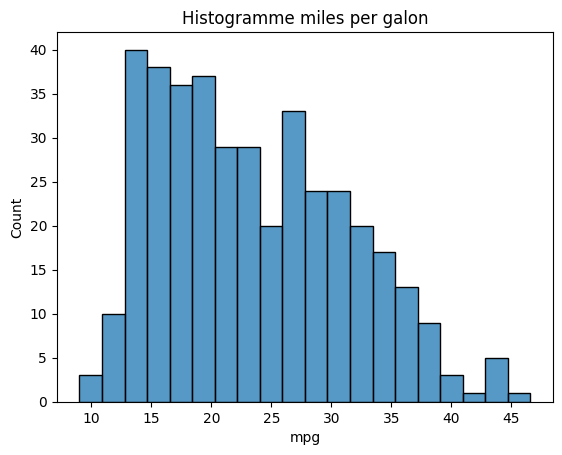

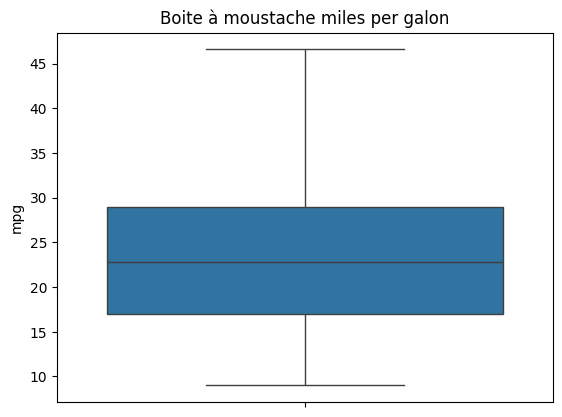

In [26]:
sns.histplot(df["mpg"], bins=20).set_title("Histogramme miles per galon")
plt.show()
sns.boxplot(df["mpg"]).set_title("Boite à moustache miles per galon")
plt.show()

### 3. Analysez la variable "cylinders"

cylinders
4    0.507653
8    0.262755
6    0.211735
3    0.010204
5    0.007653
Name: proportion, dtype: float64


<Axes: xlabel='cylinders', ylabel='count'>

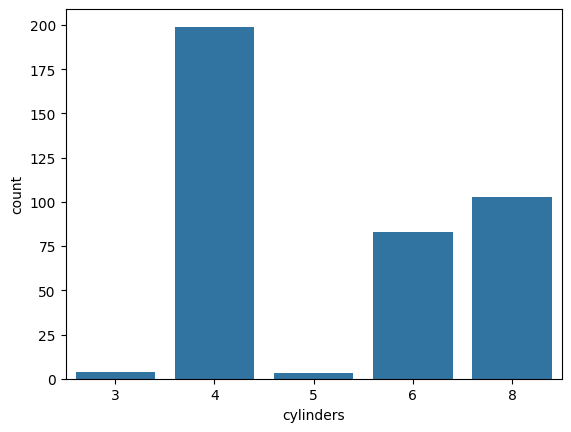

In [32]:
# print(df["cylinders"].value_counts())
print(df["cylinders"].value_counts(normalize=True))
sns.barplot(df["cylinders"].value_counts())


### 4. Analysez la variable "origin"

origin
usa       0.625000
japan     0.201531
europe    0.173469
Name: proportion, dtype: float64


<Axes: xlabel='origin', ylabel='count'>

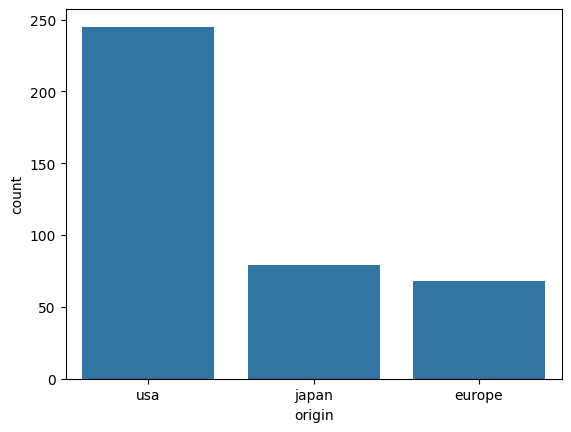

In [33]:
# print(df["origin"].value_counts())
print(df["origin"].value_counts(normalize=True))
sns.barplot(df["origin"].value_counts())

### 5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower)

- Que semble-t-on voir ?

- Rajoutez-y la variable de l'année du modèle. Que voit-on ?

<Axes: xlabel='horsepower', ylabel='mpg'>

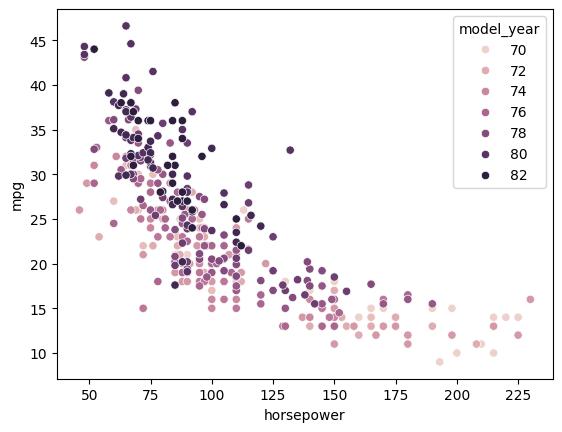

In [36]:
sns.scatterplot(df, x="horsepower", y="mpg", hue="model_year")

Il semble apparaitre que la consommation par chevaux des voitures aux USA, au japon et en Europe a augmenté au cours des années 70.

### 6. Observez l'évolution du poids moyen des voitures américaines de l'année 70 jusqu'à l'année 82.

- Que semble-t-on voir ?

- Voit-on également cela pour les autres pays ?

<Axes: xlabel='model_year', ylabel='weight'>

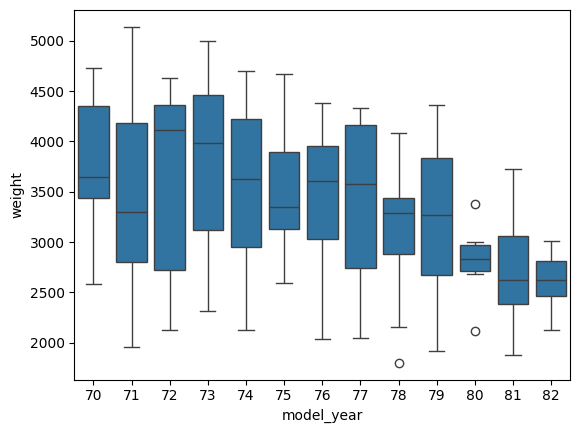

In [38]:
america_data = df[df["origin"] == "usa"]
sns.boxplot(america_data, x="model_year", y="weight")

Le poids des voitures aux USA semblent se réduire et s'uniformiser aux cours des années 70.

Text(0.5, 1.0, 'Evolution du poids des voitures')

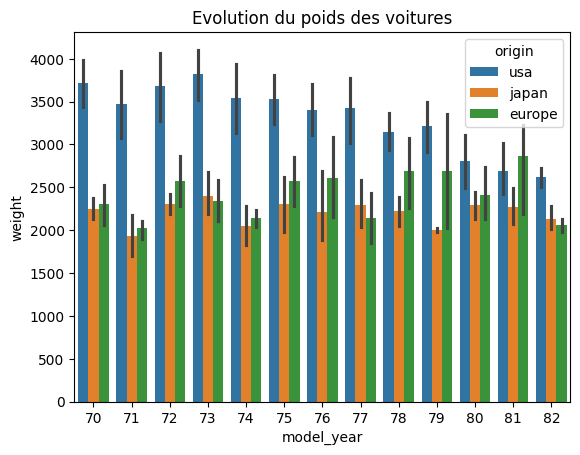

In [48]:
sns.barplot(df, x="model_year", y="weight", hue="origin").set_title("Evolution du poids des voitures")

### 7. Analysez la relation entre le nombre de cylindres et l'année du modèle.

- Se dégage-t'il quelque chose de cette analyse ?

Text(0.5, 1.0, 'Evolution de la cylindrée par origine')
La cylindrée aux USA semble diminuer au cours des années 70


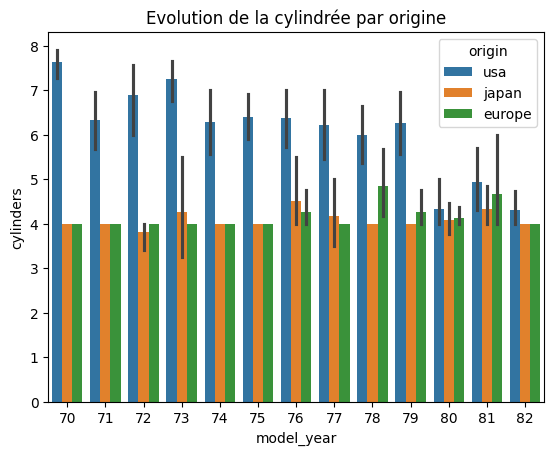

In [51]:
print(sns.barplot(df, x="model_year", y="cylinders", hue="origin").set_title("Evolution de la cylindrée par origine"))
print("La cylindrée aux USA semble diminuer au cours des années 70")


### 8. Analysez la relation entre le nombre de cylindres et l'origine.

- Se dégage-t'il quelque chose de cette analyse ?

Text(0.5, 1.0, 'Répartition de la cylindrée par origine')
Seul les USA on construit des voitures 8 cylindres de 70 à 82


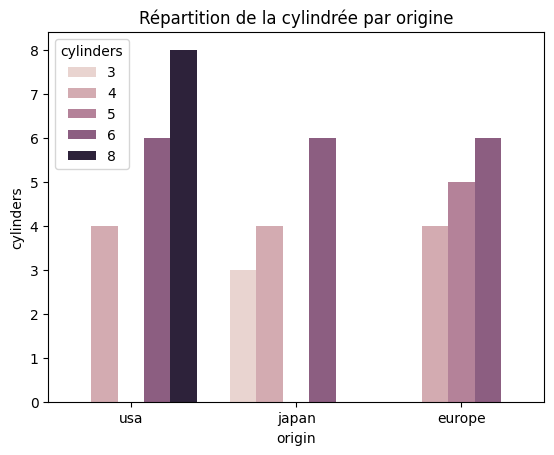

In [56]:
print(sns.barplot(df, y="cylinders", x="origin", hue="cylinders").set_title("Répartition de la cylindrée par origine"))
print("Seul les USA on construit des voitures 8 cylindres de 70 à 82")

### 9. Quelle est l'accélération moyenne des voitures des différents pays ?

Text(0.5, 1.0, 'Accélération moyenne par origine')

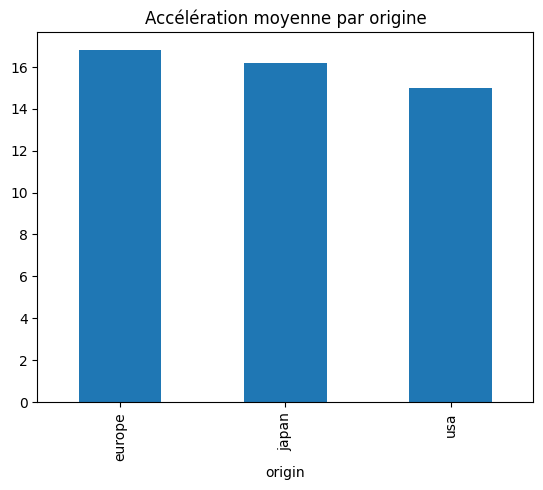

In [62]:
df.groupby("origin")["acceleration"].mean().plot(kind="bar").set_title("Accélération moyenne par origine")

### 10. Quelle est-elle pour les modèles de l'année 80 ?

Text(0.5, 1.0, 'Accélération moyenne par origine')

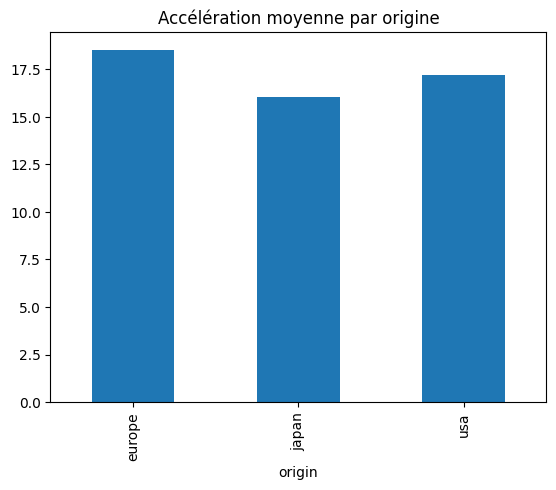

In [63]:
df[df["model_year"] == 80].groupby("origin")["acceleration"].mean().plot(kind="bar").set_title("Accélération moyenne par origine")

### 11. Au final Il semblerait qu'une tendance se dégage à travers le temps...

- faites la liste de tous les phénomènes qui semblent se produire (diminution ? augmentation ?) pour les différentes variables et groupes

- Augmentation de la consommation au fil du temps
- Diminution de la puissance et du poids au fil du temps
- Utilisation plus importante d'un moteur avec un nombre pair de cylindres